## Mission 1. Netflix and Code
### Mandatory Part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#넷플릭스 데이터 받아오기
netflix = pd.read_csv("./netflix_titles.csv")

netflix_korea = netflix[netflix['country'] == 'South Korea']["show_id"]

netflix_korea.count()

183

### Bonus Part

In [2]:
# Nan 값 제거.. 이걸 몰라서 좀 헤맸다ㅎㅎ
netflix_only = netflix.dropna(axis=0, subset=['country'])

# 콤마 가지고 있으면 제거하기.
netflix_only = netflix_only[~(netflix_only['country'].str.contains(","))]

#나라 당 작품 수
netflix_only = netflix_only['show_id'].groupby(by = netflix_only['country']).count()

# 가장 많은 작품이 올라간 나라
netflix_only[netflix_only == netflix_only.max()]

country
United States    2555
Name: show_id, dtype: int64

## Mission 2. 가즈아!
### Mandatory Part

In [3]:
# 필요한 값만 가져오는 방법...
bitcoin = pd.read_csv("./BitCoin.csv", index_col = "Date", parse_dates = True, 
                     usecols = ["Date", "Open"])

bitcoin.head(5)

,Open
Date,
2017-09-22,3628.02
2017-09-21,3901.47
2017-09-20,3916.36
2017-09-19,4073.79
2017-09-18,3591.09


In [4]:
bitcoin.sort_index(inplace = True)
bitcoin = bitcoin.loc['2016-06-01':'2017-06-30']
bitcoin = bitcoin.Open.rolling(window = 5).mean()

bitcoin

Date
2016-06-01         NaN
2016-06-02         NaN
2016-06-03         NaN
2016-06-04         NaN
2016-06-05     418.238
                ...   
2017-06-26    2666.942
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
Name: Open, Length: 377, dtype: float64

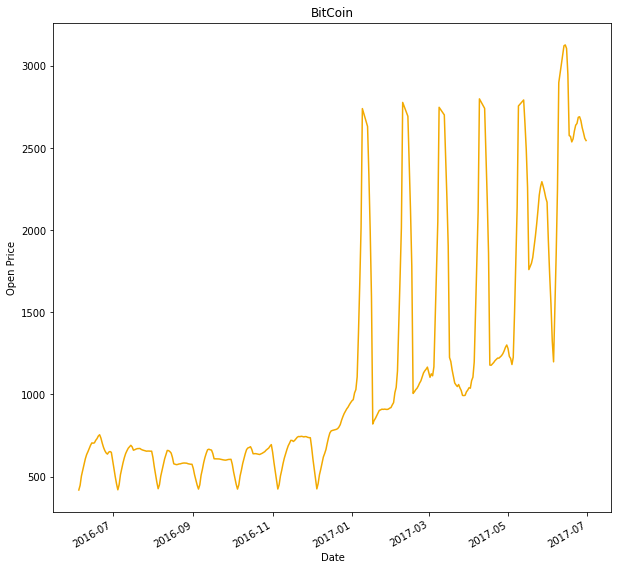

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
           
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("BitCoin")
           
bitcoin.plot(color = '#f2a900')
plt.show()

### Bonus

In [11]:
ethereum = pd.read_csv("./ETH_day.csv", index_col = "Date", parse_dates = True, 
                     usecols = ["Date", "Open"])

ethereum.sort_index(inplace = True)
ethereum = ethereum.loc['2016-06-01':'2017-06-30']

ethereum = ethereum.Open.rolling(window = 5).mean()

ethereum

Date
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-04        NaN
2016-06-05     13.982
               ...   
2017-06-26    310.850
2017-06-27    296.592
2017-06-28    289.898
2017-06-29    288.066
2017-06-30    285.866
Name: Open, Length: 395, dtype: float64

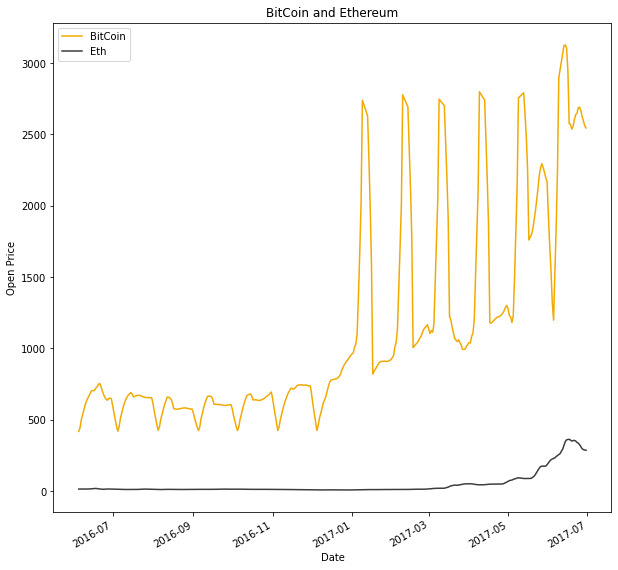

In [15]:
plt.figure(figsize = (10, 10))
           
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("BitCoin and Ethereum")
           
bitcoin.plot(color = '#f2a900', label = 'BitCoin')
ethereum.plot(color = '#3c3c3d', label = 'Eth')

plt.legend()

plt.show()